## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.709631 -0.427227 -1.073253 -1.375460 -0.723792 -1.211528
1 -0.602689  0.981388 -0.794356 -0.028142  1.245938  0.668469
2  0.021748 -1.243234 -0.827353  0.683211 -1.642755 -0.678415
3 -0.806134 -1.287640  0.739320 -1.286123 -1.876562 -2.171190
4 -0.821915 -1.444405 -0.509356  1.256115 -0.318977 -0.425038


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0026936	total: 67.6ms	remaining: 1m 7s
1:	learn: 0.9942249	total: 68.3ms	remaining: 34.1s
2:	learn: 0.9846989	total: 68.9ms	remaining: 22.9s
3:	learn: 0.9748384	total: 69.5ms	remaining: 17.3s
4:	learn: 0.9652617	total: 70ms	remaining: 13.9s
5:	learn: 0.9560140	total: 70.5ms	remaining: 11.7s
6:	learn: 0.9447528	total: 71.1ms	remaining: 10.1s
7:	learn: 0.9354967	total: 71.7ms	remaining: 8.89s
8:	learn: 0.9259957	total: 72.2ms	remaining: 7.95s
9:	learn: 0.9170344	total: 72.6ms	remaining: 7.19s
10:	learn: 0.9086567	total: 73.2ms	remaining: 6.58s
11:	learn: 0.8982574	total: 73.7ms	remaining: 6.07s
12:	learn: 0.8892518	total: 74.3ms	remaining: 5.64s
13:	learn: 0.8808409	total: 74.8ms	remaining: 5.27s
14:	learn: 0.8729036	total: 75.3ms	remaining: 4.94s
15:	learn: 0.8645050	total: 75.8ms	remaining: 4.66s
16:	learn: 0.8570753	total: 76.1ms	remaining: 4.4s
17:	learn: 0.8501458	total: 76.7ms	remaining: 4.18s
18:	learn: 0.8432816	total: 77.2ms	remaining: 3

93:	learn: 0.4398708	total: 110ms	remaining: 1.06s
94:	learn: 0.4365844	total: 110ms	remaining: 1.05s
95:	learn: 0.4331472	total: 111ms	remaining: 1.04s
96:	learn: 0.4295607	total: 111ms	remaining: 1.03s
97:	learn: 0.4265591	total: 112ms	remaining: 1.03s
98:	learn: 0.4233033	total: 112ms	remaining: 1.02s
99:	learn: 0.4202931	total: 112ms	remaining: 1.01s
100:	learn: 0.4174745	total: 113ms	remaining: 1s
101:	learn: 0.4145974	total: 113ms	remaining: 997ms
102:	learn: 0.4118724	total: 114ms	remaining: 990ms
103:	learn: 0.4088242	total: 114ms	remaining: 983ms
104:	learn: 0.4066962	total: 115ms	remaining: 977ms
105:	learn: 0.4034987	total: 115ms	remaining: 970ms
106:	learn: 0.4003751	total: 116ms	remaining: 965ms
107:	learn: 0.3975150	total: 116ms	remaining: 959ms
108:	learn: 0.3948325	total: 117ms	remaining: 953ms
109:	learn: 0.3922872	total: 117ms	remaining: 946ms
110:	learn: 0.3896018	total: 117ms	remaining: 941ms
111:	learn: 0.3868633	total: 118ms	remaining: 936ms
112:	learn: 0.3838364	

260:	learn: 0.1375278	total: 188ms	remaining: 532ms
261:	learn: 0.1367653	total: 188ms	remaining: 531ms
262:	learn: 0.1358569	total: 189ms	remaining: 529ms
263:	learn: 0.1350113	total: 189ms	remaining: 528ms
264:	learn: 0.1342581	total: 190ms	remaining: 526ms
265:	learn: 0.1332857	total: 190ms	remaining: 525ms
266:	learn: 0.1323096	total: 191ms	remaining: 523ms
267:	learn: 0.1314851	total: 191ms	remaining: 522ms
268:	learn: 0.1306624	total: 191ms	remaining: 520ms
269:	learn: 0.1298490	total: 192ms	remaining: 519ms
270:	learn: 0.1292631	total: 192ms	remaining: 517ms
271:	learn: 0.1284252	total: 193ms	remaining: 516ms
272:	learn: 0.1274281	total: 193ms	remaining: 515ms
273:	learn: 0.1266424	total: 194ms	remaining: 513ms
274:	learn: 0.1256858	total: 194ms	remaining: 512ms
275:	learn: 0.1249781	total: 195ms	remaining: 511ms
276:	learn: 0.1239782	total: 195ms	remaining: 509ms
277:	learn: 0.1229397	total: 196ms	remaining: 508ms
278:	learn: 0.1224268	total: 196ms	remaining: 507ms
279:	learn: 

484:	learn: 0.0409135	total: 293ms	remaining: 311ms
485:	learn: 0.0407875	total: 294ms	remaining: 311ms
486:	learn: 0.0405962	total: 294ms	remaining: 310ms
487:	learn: 0.0404734	total: 295ms	remaining: 309ms
488:	learn: 0.0402853	total: 295ms	remaining: 308ms
489:	learn: 0.0401200	total: 296ms	remaining: 308ms
490:	learn: 0.0400027	total: 296ms	remaining: 307ms
491:	learn: 0.0398217	total: 297ms	remaining: 306ms
492:	learn: 0.0396361	total: 297ms	remaining: 306ms
493:	learn: 0.0394586	total: 298ms	remaining: 305ms
494:	learn: 0.0393029	total: 298ms	remaining: 304ms
495:	learn: 0.0391419	total: 298ms	remaining: 303ms
496:	learn: 0.0389911	total: 299ms	remaining: 302ms
497:	learn: 0.0388331	total: 299ms	remaining: 302ms
498:	learn: 0.0386273	total: 300ms	remaining: 301ms
499:	learn: 0.0384721	total: 300ms	remaining: 300ms
500:	learn: 0.0383031	total: 301ms	remaining: 300ms
501:	learn: 0.0381509	total: 301ms	remaining: 299ms
502:	learn: 0.0380330	total: 302ms	remaining: 298ms
503:	learn: 

644:	learn: 0.0198097	total: 371ms	remaining: 204ms
645:	learn: 0.0197102	total: 372ms	remaining: 204ms
646:	learn: 0.0196288	total: 372ms	remaining: 203ms
647:	learn: 0.0195210	total: 373ms	remaining: 203ms
648:	learn: 0.0194232	total: 373ms	remaining: 202ms
649:	learn: 0.0193276	total: 374ms	remaining: 201ms
650:	learn: 0.0192321	total: 374ms	remaining: 200ms
651:	learn: 0.0191390	total: 374ms	remaining: 200ms
652:	learn: 0.0190321	total: 375ms	remaining: 199ms
653:	learn: 0.0189388	total: 375ms	remaining: 198ms
654:	learn: 0.0188417	total: 375ms	remaining: 198ms
655:	learn: 0.0187311	total: 376ms	remaining: 197ms
656:	learn: 0.0186429	total: 377ms	remaining: 197ms
657:	learn: 0.0185393	total: 377ms	remaining: 196ms
658:	learn: 0.0184539	total: 377ms	remaining: 195ms
659:	learn: 0.0183651	total: 378ms	remaining: 195ms
660:	learn: 0.0182799	total: 379ms	remaining: 194ms
661:	learn: 0.0181744	total: 379ms	remaining: 194ms
662:	learn: 0.0180914	total: 380ms	remaining: 193ms
663:	learn: 

867:	learn: 0.0074068	total: 477ms	remaining: 72.5ms
868:	learn: 0.0073787	total: 477ms	remaining: 71.9ms
869:	learn: 0.0073516	total: 477ms	remaining: 71.3ms
870:	learn: 0.0073162	total: 478ms	remaining: 70.8ms
871:	learn: 0.0072892	total: 478ms	remaining: 70.2ms
872:	learn: 0.0072673	total: 479ms	remaining: 69.7ms
873:	learn: 0.0072410	total: 479ms	remaining: 69.1ms
874:	learn: 0.0072063	total: 480ms	remaining: 68.5ms
875:	learn: 0.0071844	total: 480ms	remaining: 68ms
876:	learn: 0.0071644	total: 481ms	remaining: 67.4ms
877:	learn: 0.0071304	total: 481ms	remaining: 66.8ms
878:	learn: 0.0071091	total: 481ms	remaining: 66.3ms
879:	learn: 0.0070895	total: 482ms	remaining: 65.7ms
880:	learn: 0.0070563	total: 482ms	remaining: 65.2ms
881:	learn: 0.0070312	total: 483ms	remaining: 64.6ms
882:	learn: 0.0069993	total: 483ms	remaining: 64ms
883:	learn: 0.0069749	total: 484ms	remaining: 63.5ms
884:	learn: 0.0069543	total: 484ms	remaining: 62.9ms
885:	learn: 0.0069234	total: 485ms	remaining: 62.4

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

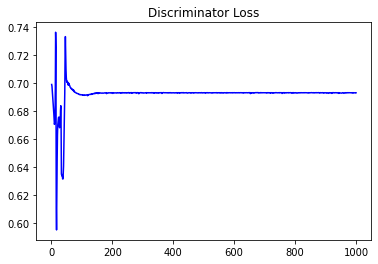

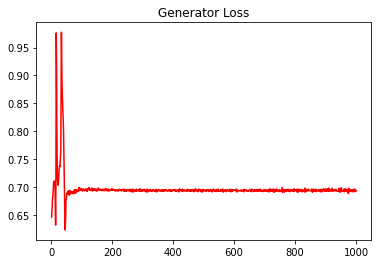

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.06732097858074457


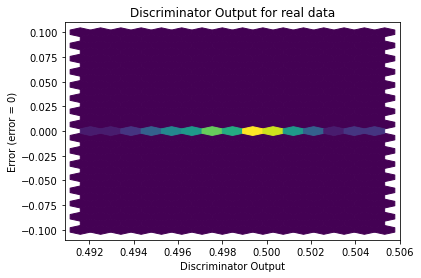

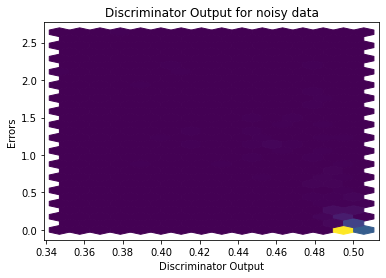

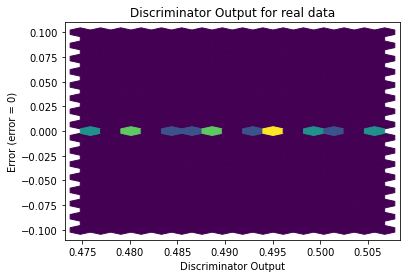

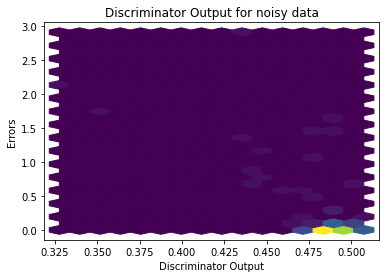

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


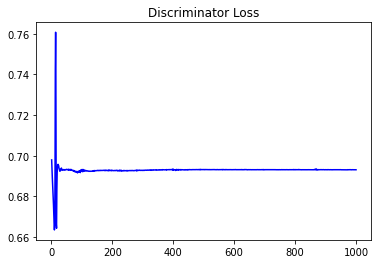

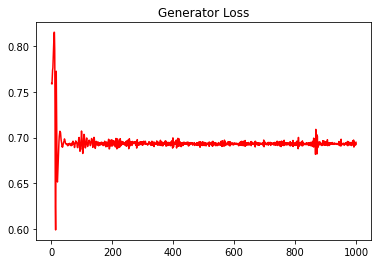

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.10328241957931489


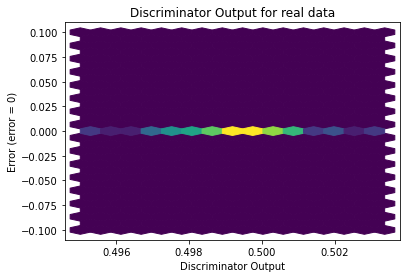

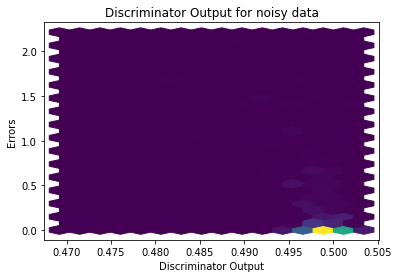

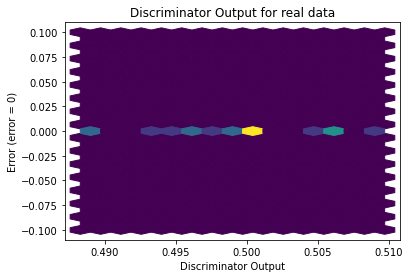

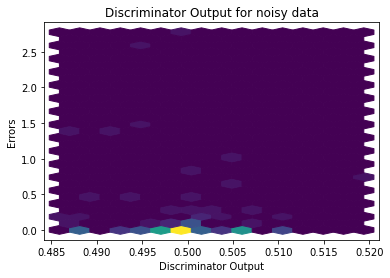

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0740]], requires_grad=True)
